<a href="https://colab.research.google.com/github/Jhonnety/big_data/blob/main/decision_tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
col_names = ['age','job','marital','education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
#What's above its optional
df = pd.read_csv("/content/drive/MyDrive/semestre 10/Big data/datasets/bank_marketing.csv", names=col_names, sep=";")

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [ ]:
# Calculamos correlaciones // solo regresion
corr_matrix = df.corr()
corr_matrix["y"].sort_values(ascending=False)

<ipython-input-5-43874d34de9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


y           1.000000
campaign    0.073172
day         0.028348
age        -0.025155
balance    -0.052838
previous   -0.093236
pdays      -0.103621
duration   -0.394521
Name: y, dtype: float64

In [ ]:
# Se puede llegar a valorar quedarnos con aquellas que tienen mayor correlación
corr_matrix[corr_matrix["y"] > 0.02]

,age,balance,day,duration,campaign,pdays,previous,y
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.028348
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.073172
y,-0.025155,-0.052838,0.028348,-0.394521,0.073172,-0.103621,-0.093236,1.000000


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
5,35,management,married,2,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1
6,28,management,single,2,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,1
7,42,entrepreneur,divorced,2,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,1
8,58,retired,married,0,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,1
9,43,technician,single,1,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,1


In [ ]:
data = pd.get_dummies(df['housing'])
df['housing'] = data['yes']

data = pd.get_dummies(df['loan'])
df['loan'] = data['yes']
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,1,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,1,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,3,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,3,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,1
5,35,management,married,2,no,231,1,0,unknown,5,may,139,1,-1,0,unknown,1
6,28,management,single,2,no,447,1,1,unknown,5,may,217,1,-1,0,unknown,1
7,42,entrepreneur,divorced,2,yes,2,1,0,unknown,5,may,380,1,-1,0,unknown,1
8,58,retired,married,0,no,121,1,0,unknown,5,may,50,1,-1,0,unknown,1
9,43,technician,single,1,no,593,1,0,unknown,5,may,55,1,-1,0,unknown,1


In [ ]:
data = pd.get_dummies(df['job'])
data.head(10)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df, data], axis=1)
df = df.drop('job', axis=1)
df.head(10)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,married,2,no,2143,1,0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,single,1,no,29,1,0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,married,1,no,2,1,1,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,married,3,no,1506,1,0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,single,3,no,1,0,0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,1
5,35,married,2,no,231,1,0,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
6,28,single,2,no,447,1,1,unknown,5,may,...,0,0,1,0,0,0,0,0,0,0
7,42,divorced,2,yes,2,1,0,unknown,5,may,...,1,0,0,0,0,0,0,0,0,0
8,58,married,0,no,121,1,0,unknown,5,may,...,0,0,0,1,0,0,0,0,0,0
9,43,single,1,no,593,1,0,unknown,5,may,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#separar los datos en variables explicativas y variable objetivo
x = df[['age',	'education',	'balance',	'housing',	'loan',	'admin.',	'blue-collar',	'entrepreneur', 'housemaid',	'management',	'retired', 'self-employed',	'services',	'student',	'technician', 'unemployed',	'unknown'	]]
y = df[['y']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( max_depth=5) #los hiperparametros son valores que nosotros ajustamos antes del entrenamiento que e slo que vamos hacer
#Los parametros son los que nos entrega el modelo, por ejemplo los coeficientes que nos entrego el modelo de ventas de linear regression
# max_depth profundidad del arbolito
clf = clf.fit(x_train, y_train)

In [ ]:
importance = clf.feature_importances_
for i, feature in enumerate(x_train.columns):
    print(f"Variable: {feature}, Importancia: {round(importance[i], 3)}")

Variable: age, Importancia: 0.578
Variable: education, Importancia: 0.049
Variable: balance, Importancia: 0.155
Variable: housing, Importancia: 0.192
Variable: loan, Importancia: 0.004
Variable: admin., Importancia: 0.002
Variable: blue-collar, Importancia: 0.0
Variable: entrepreneur, Importancia: 0.0
Variable: housemaid, Importancia: 0.0
Variable: management, Importancia: 0.0
Variable: retired, Importancia: 0.0
Variable: self-employed, Importancia: 0.005
Variable: services, Importancia: 0.0
Variable: student, Importancia: 0.005
Variable: technician, Importancia: 0.0
Variable: unemployed, Importancia: 0.005
Variable: unknown, Importancia: 0.005


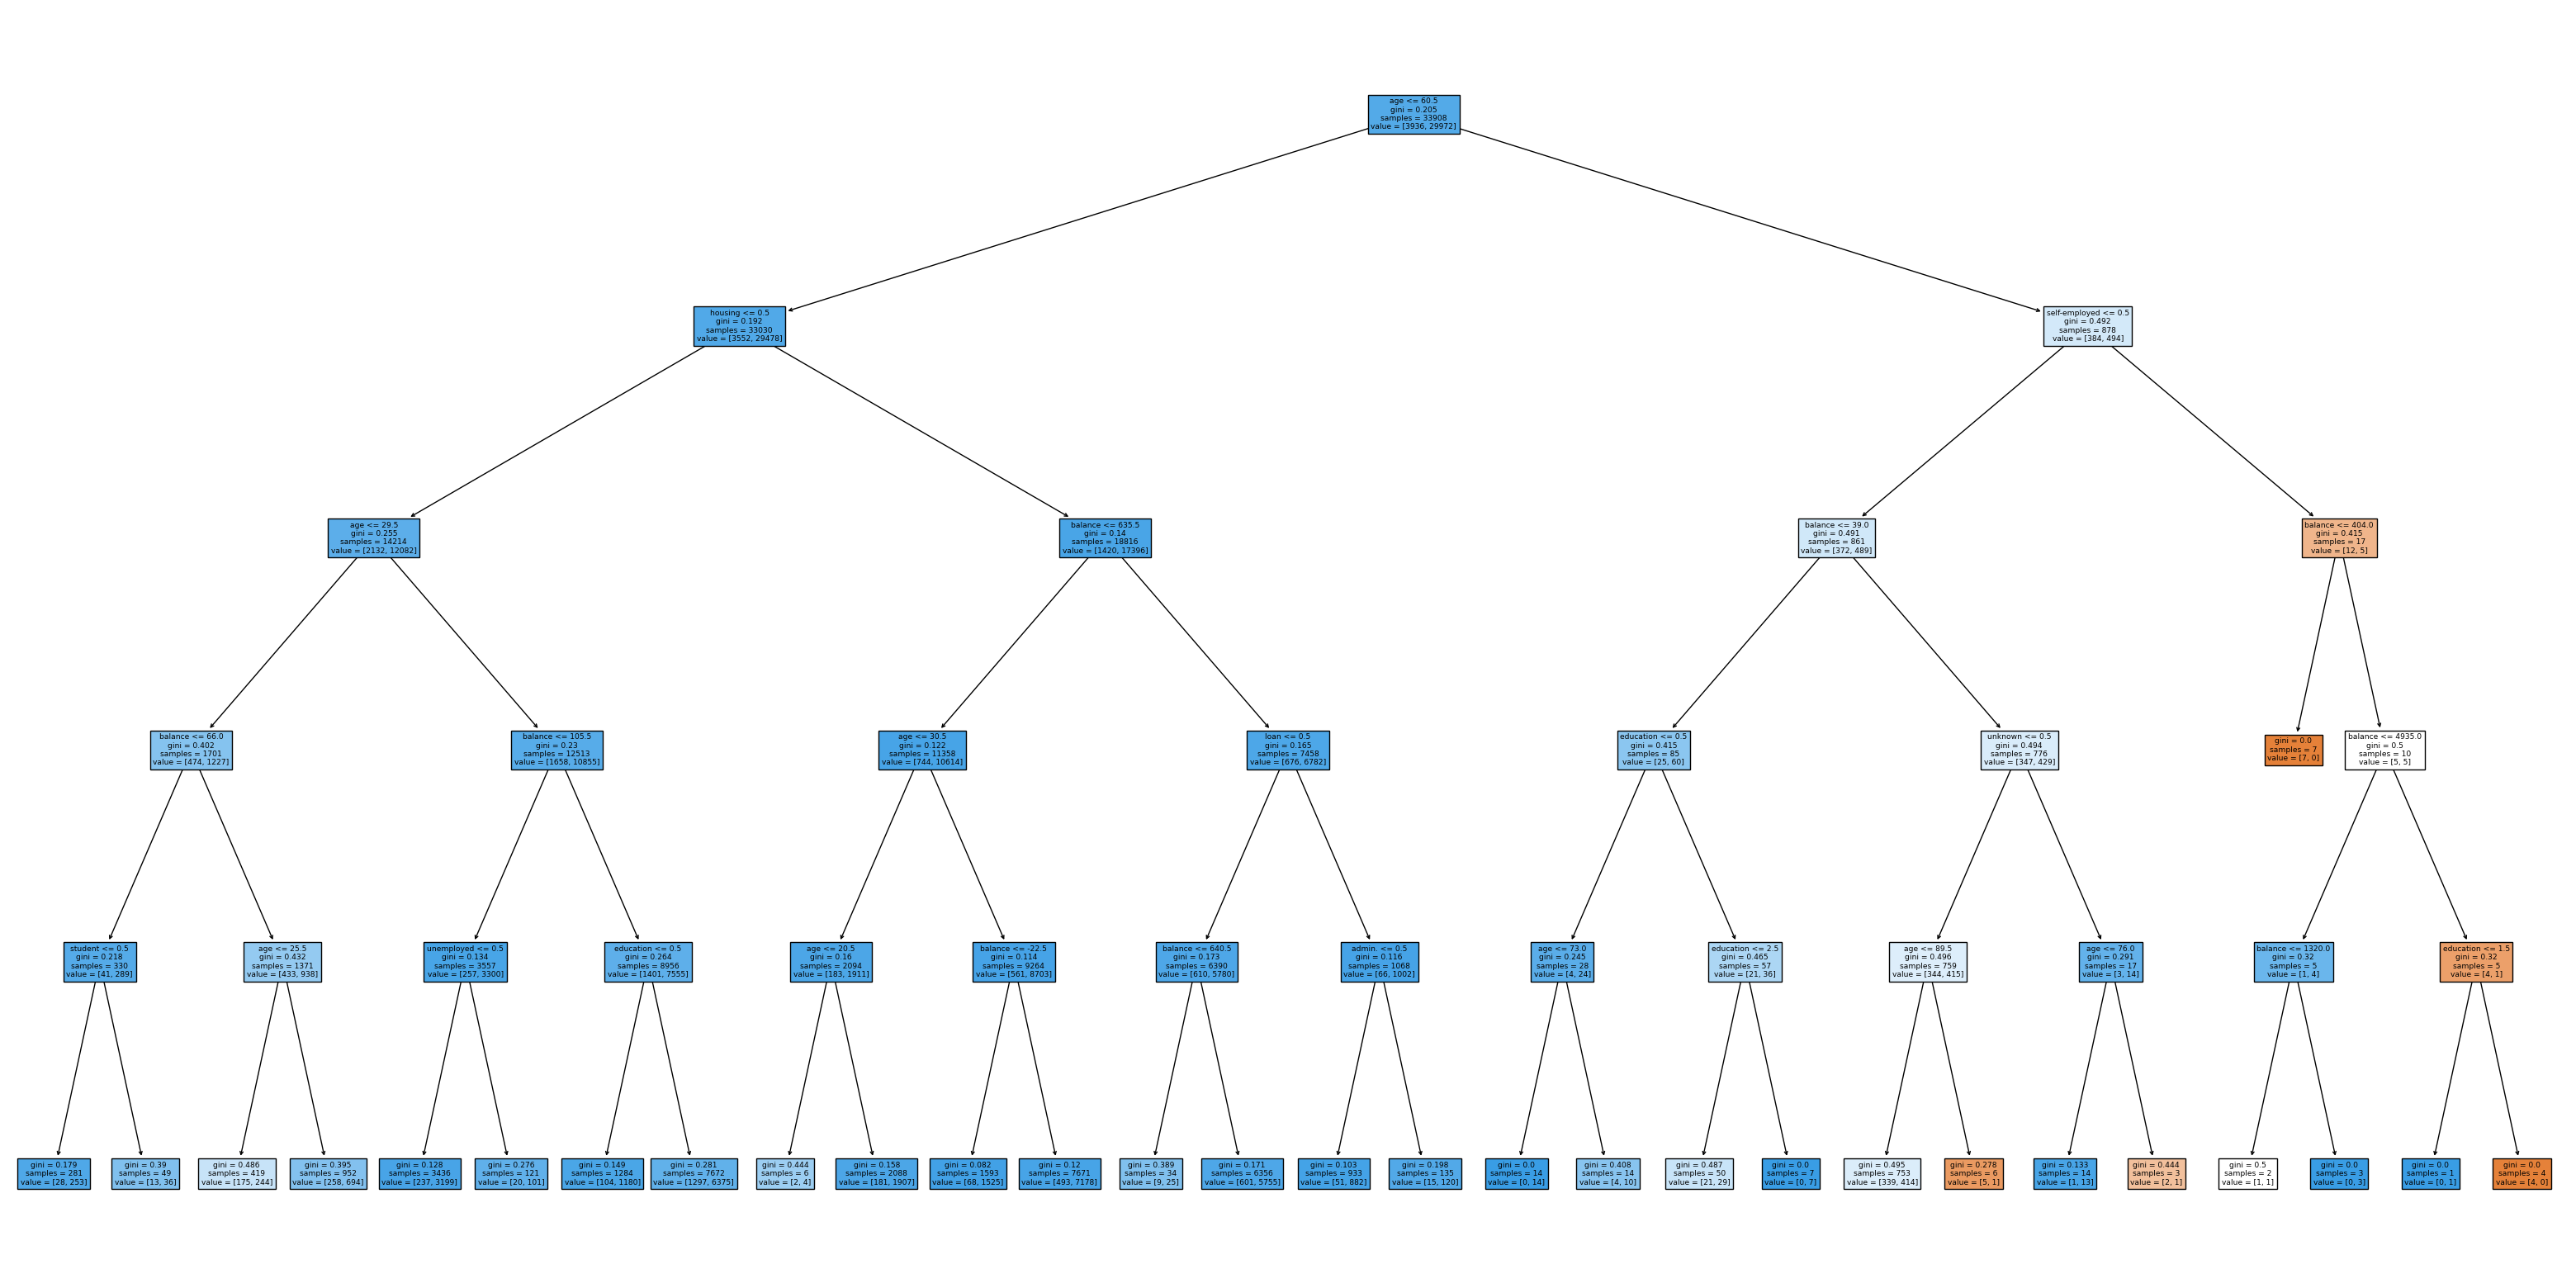

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(clf, filled=True, feature_names=['age',	'education',	'balance',	'housing',	'loan',	'admin.',	'blue-collar',	'entrepreneur', 'housemaid',	'management',	'retired', 'self-employed',	'services',	'student',	'technician', 'unemployed',	'unknown'	])
plt.show()

In [ ]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred) * 100)

Accuracy:  88.07396266477926


In [ ]:
lista_test = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del test
lista_train = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del train
porcent_deep = 0
may_deep = 0
for profundidad in range(2, 21):  #Estrutura iterativa para cambiar la profundidad para cambiar la profundidad de 2 a 20
  clf = DecisionTreeClassifier( max_depth=profundidad) # Instanciamos el modelo
  clf.fit(x_train, y_train) #Entrenamos modelo

  y_pred = clf.predict(x_test)  #Hacemos las predicciones sobre el conjunto de evaluacion
  y_pred2 = clf.predict(x_train)  #Hacemos las predicciones sobre el conjunto de entrenamiento

  ev_model_test = metrics.accuracy_score(y_test,y_pred) #Calculamos la exactitud en el test
  ev_model_train = metrics.accuracy_score(y_train,y_pred2) #Calculamos la exactitud en el train

  if ev_model_test > porcent_deep :
    porcent_deep = ev_model_test
    may_deep = profundidad
  lista_test.append(ev_model_test) #Agregamos los valores a la lista
  lista_train.append(ev_model_train) #Agregamos los valores a la lista


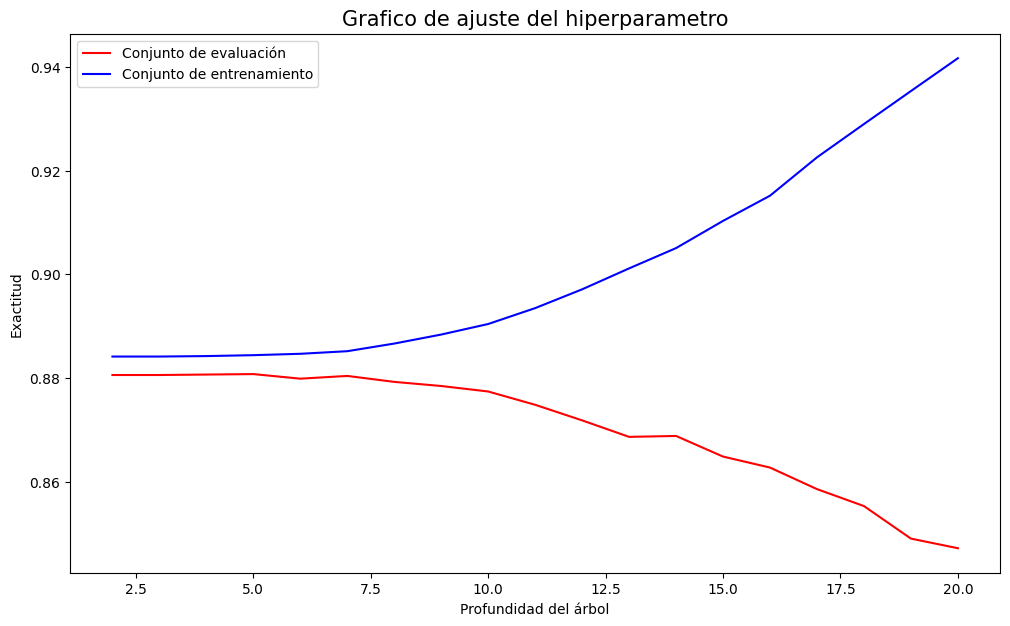

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(2,21), lista_test, color="r", label="Conjunto de evaluación") #eje horizontal range(2,21) / eje vertical  lista_test
plt.plot(range(2,21), lista_train, color="b", label="Conjunto de entrenamiento")
plt.title("Grafico de ajuste del hiperparametro", fontsize=15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad del árbol')
plt.show()
#El overfitting no depende de la cantidad de los datos, si no en la complejidad del modelo

In [ ]:
print(f"The best deep for the tree is: {may_deep} with an accurancy of: {porcent_deep}")

The best deep for the tree is: 5 with an accurancy of: 0.8807396266477926


3). Concluyo que solo es relevante examinar las variables age, housing y job

In [ ]:
x = df[['age','housing',	'admin.',	'blue-collar',	'entrepreneur', 'housemaid',	'management',	'retired', 'self-employed',	'services',	'student',	'technician', 'unemployed',	'unknown'	]]
y = df[['y']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( max_depth=2) #los hiperparametros son valores que nosotros ajustamos antes del entrenamiento que e slo que vamos hacer
#Los parametros son los que nos entrega el modelo, por ejemplo los coeficientes que nos entrego el modelo de ventas de linear regression
# max_depth profundidad del arbolito
clf = clf.fit(x_train, y_train)

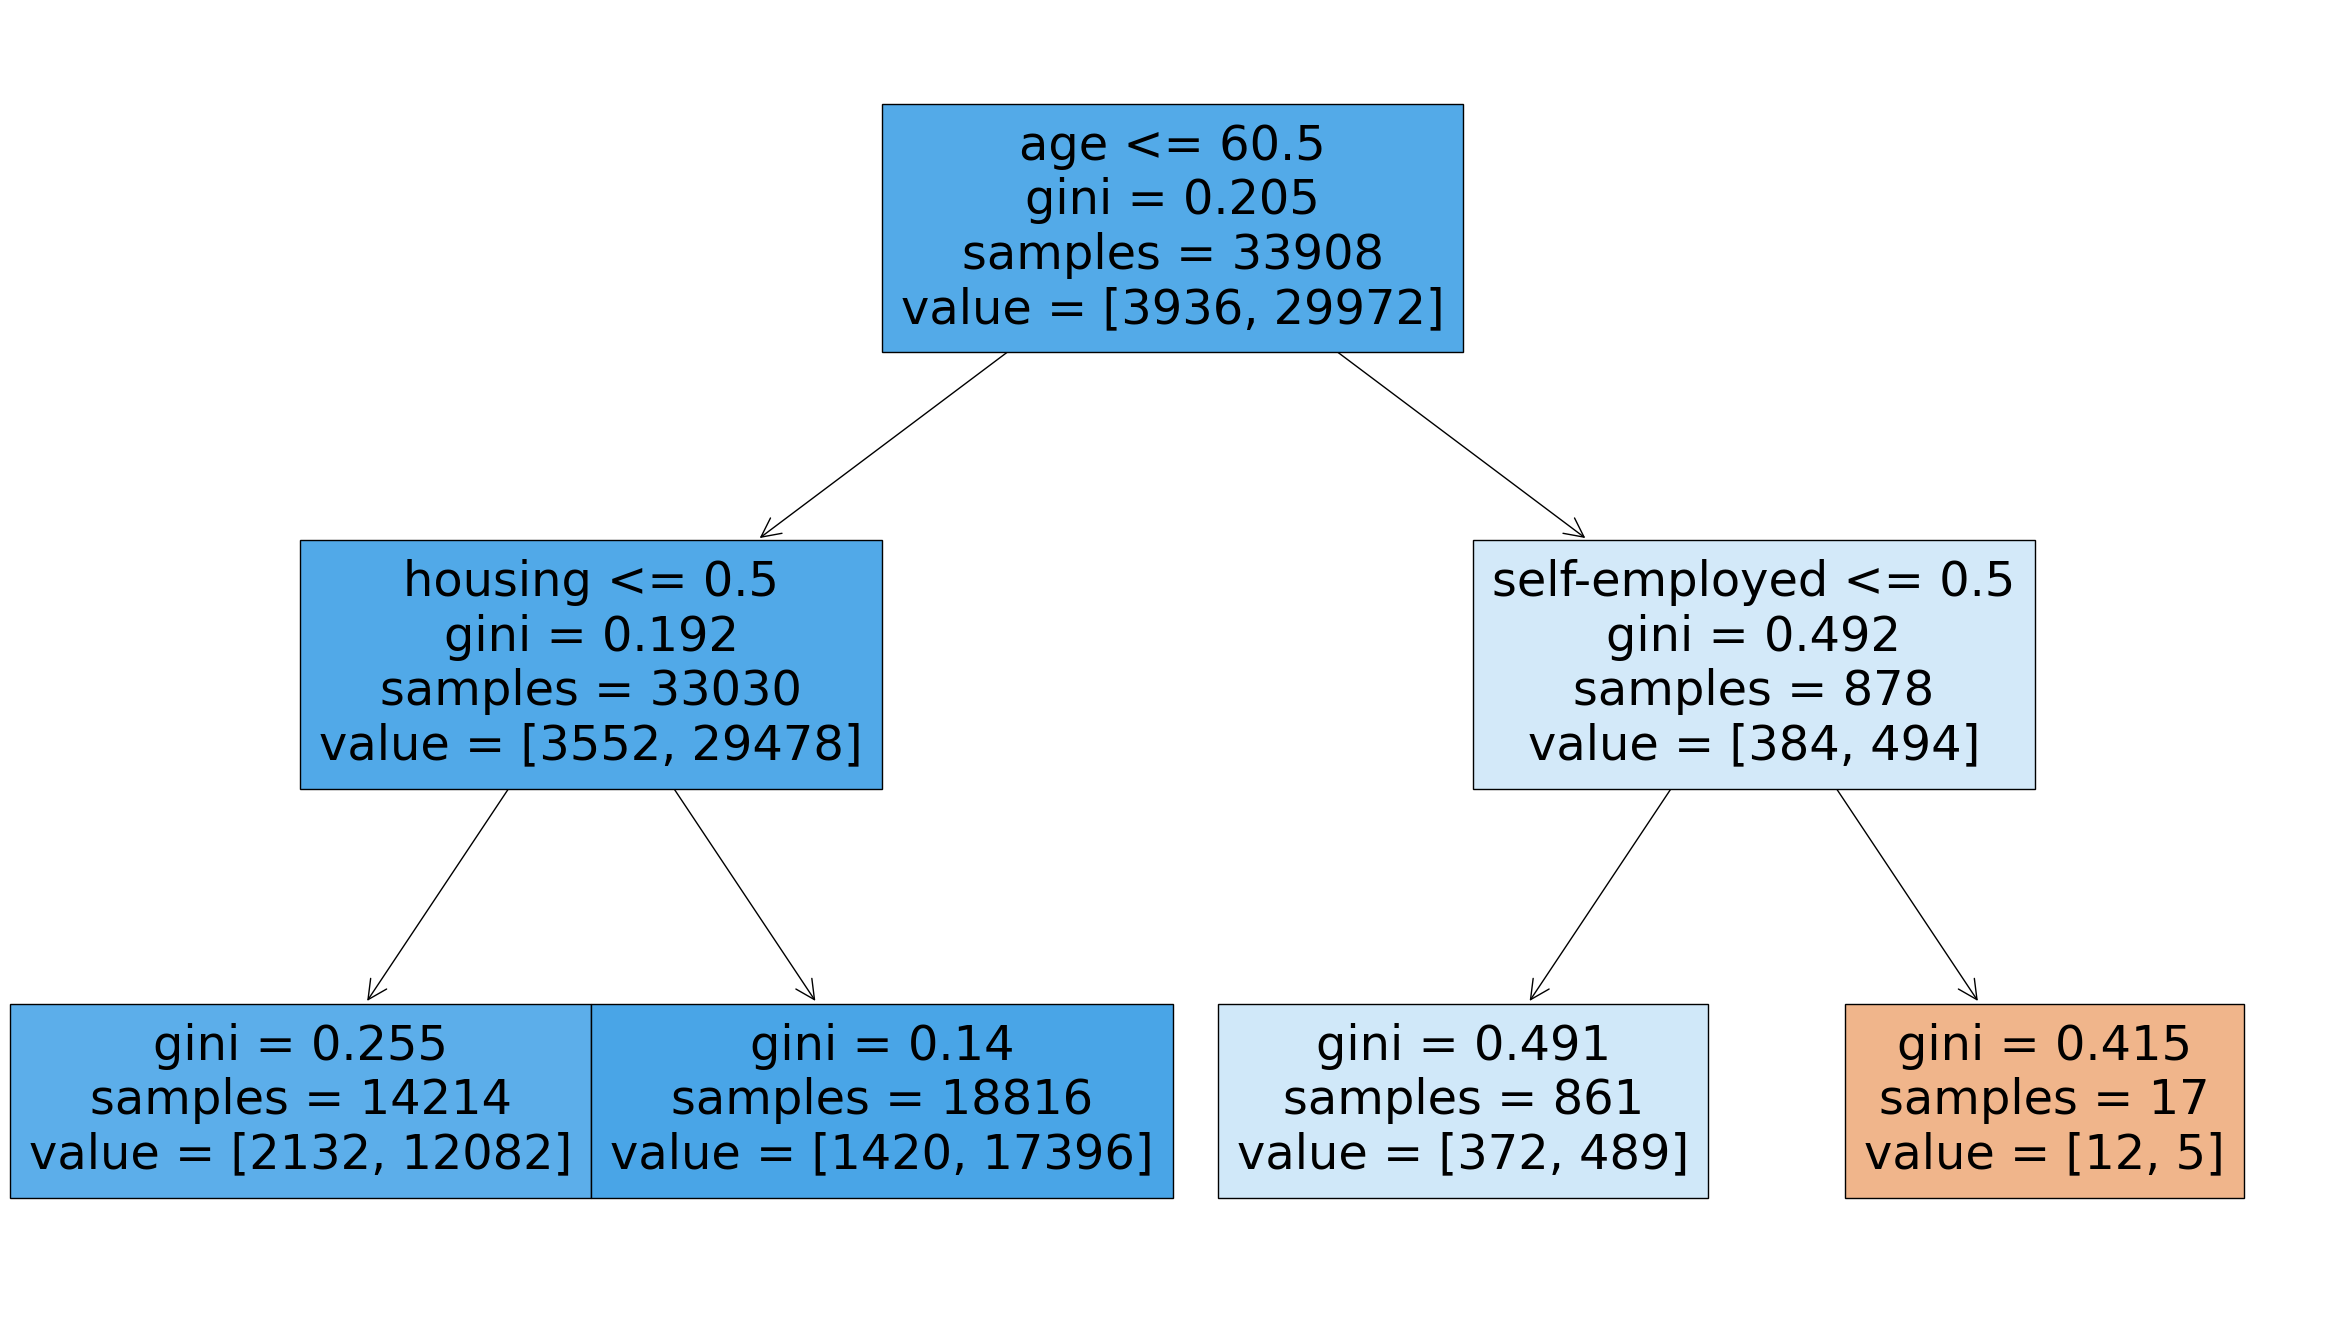

In [ ]:
from sklearn import tree
plt.figure(figsize=(30,17))
tree.plot_tree(clf, filled=True, feature_names=['age','housing',	'admin.',	'blue-collar',	'entrepreneur', 'housemaid',	'management',	'retired', 'self-employed',	'services',	'student',	'technician', 'unemployed',	'unknown'	])
plt.show()

In [ ]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred) * 100)

Accuracy:  88.05626824736795


In [ ]:
from sklearn.metrics import recall_score
y_pred = clf.predict(x_test)
print("Recall: ", metrics.recall_score(y_test,y_pred))

Recall:  0.9997989949748743


In [ ]:
from sklearn.metrics import precision_score
y_pred = clf.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,y_pred))

Precision:  0.8806657223796034


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   5 1348]
 [   2 9948]]


<function matplotlib.pyplot.show(close=None, block=None)>

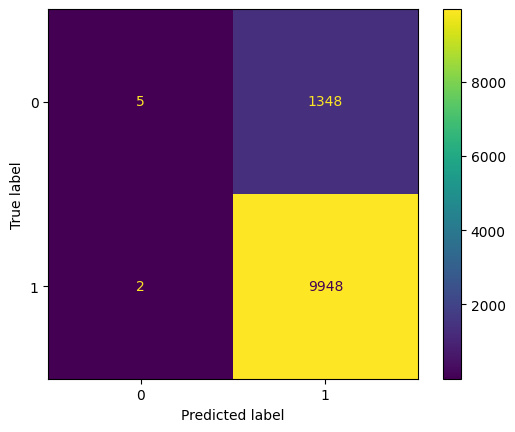

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show

4). K-nearest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9, metric="minkowski", p=2)
#n_neighbors -> this parameter indicates the number of neighbors needed for the algorithms
#metric -> Sets the distance between the points
#p = 2 --> Euclidean standard metric
classifier.fit(x_train, y_train)
#fit the model, the classifier classifies the trends based on the train data

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn import metrics
y_pred = classifier.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy:  87.01229762010085


El modelo clasifica correctamente el 87% de los datos independientemente si el cliente se subscribe o no

In [ ]:
from sklearn.metrics import recall_score
y_pred = classifier.predict(x_test)
print("Recall: ", metrics.recall_score(y_test,y_pred))

Recall:  0.9793969849246231


De los que el modelo dijo que si se subscribirian el modelo acerto en un 97.93 %

In [ ]:
from sklearn.metrics import precision_score
y_pred = classifier.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,y_pred))

Precision:  0.885265261627907


De los que el modelo dijo que si se suscribirian, acerto en un 88.52%

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  90 1263]
 [ 205 9745]]


<function matplotlib.pyplot.show(close=None, block=None)>

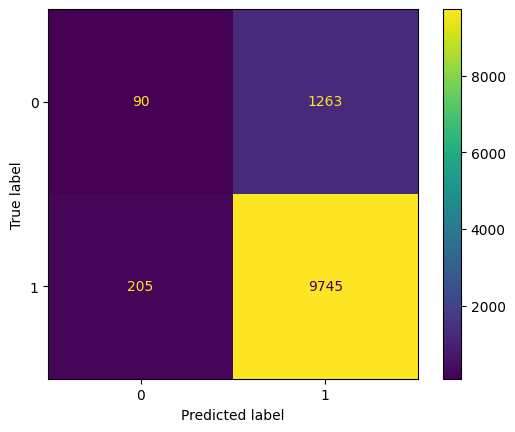

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show

In [ ]:
lista_test = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del test
lista_train = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del train
porcent_acurrancy = 0
may_k = 0
for k in range(2, 21):  #Estrutura iterativa para cambiar la profundidad para cambiar la profundidad de 2 a 20
  classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)  #Hacemos las predicciones sobre el conjunto de evaluacion
  y_pred2 = classifier.predict(x_train)  #Hacemos las predicciones sobre el conjunto de entrenamiento

  ev_model_test = metrics.accuracy_score(y_test,y_pred) #Calculamos la exactitud en el test
  ev_model_train = metrics.accuracy_score(y_train,y_pred2) #Calculamos la exactitud en el train

  if ev_model_test > porcent_acurrancy  :
    porcent_acurrancy = ev_model_test
    may_k = k
  lista_test.append(ev_model_test) #Agregamos los valores a la lista
  lista_train.append(ev_model_train) #Agregamos los valores a la lista


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

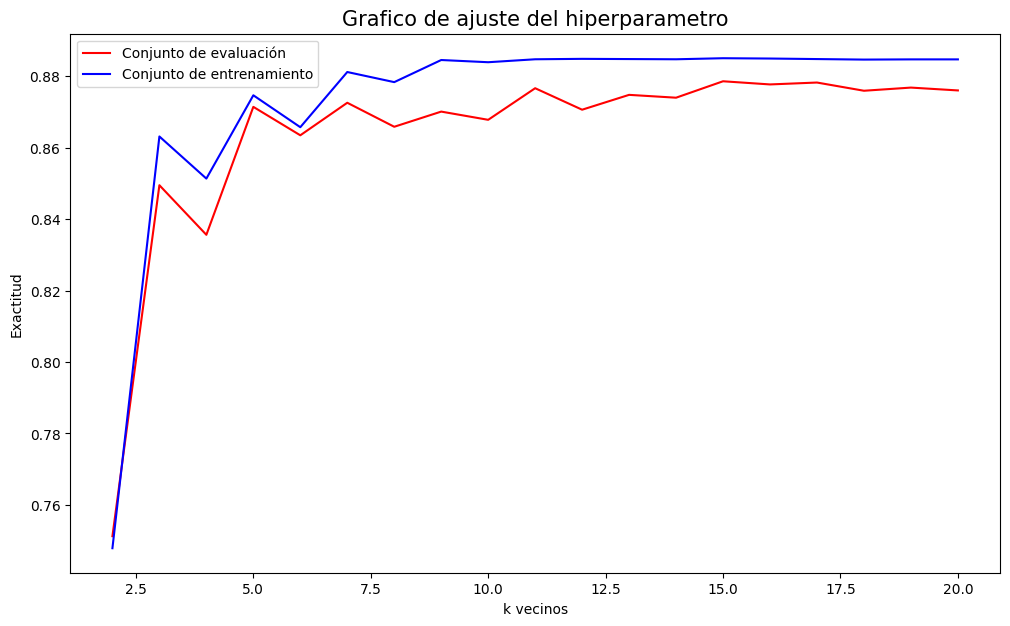

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(2,21), lista_test, color="r", label="Conjunto de evaluación") #eje horizontal range(2,21) / eje vertical  lista_test
plt.plot(range(2,21), lista_train, color="b", label="Conjunto de entrenamiento")
plt.title("Grafico de ajuste del hiperparametro", fontsize=15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('k vecinos')
plt.show()
#El overfitting no depende de la cantidad de los datos, si no en la complejidad del modelo

5). Es mejor random tree

In [ ]:
print(f"The best number of nerests is: {may_k} with an accurancy of: {porcent_acurrancy}")

The best number of nerests is: 15 with an accurancy of: 0.8786162965584358
